In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k
from tqdm import tqdm



Data

In [2]:
from keras.preprocessing.image import ImageDataGenerator, load_img


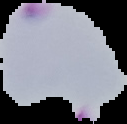

In [3]:
load_img(r"C:\Users\HP\Downloads\Malarial Cell Image Data\cell_images\Parasitized\C181P142ThinF_IMG_20151127_155722_cell_174.png")


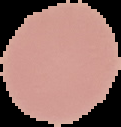

In [4]:
load_img(r"C:\Users\HP\Downloads\Malarial Cell Image Data\cell_images\Uninfected\C127P88ThinF_IMG_20151004_111526_cell_59.png")

In [5]:
os.environ['KERAS_BACKED']='tensorflow'
np.random.seed(312)

In [6]:
image_dir = r"C:\Users\HP\Downloads\Malarial Cell Image Data\malarial_cell_image_data\cell_images"
size=64
dataset=[]
label=[]

In [7]:
parasitized_dir = os.path.join(image_dir, "Parasitized")
parasitized_files = os.listdir(parasitized_dir)
parasitized_files=parasitized_files[:2000]
print(len(parasitized_files))


2000


In [8]:
for i, img_name in tqdm(enumerate(parasitized_files)):
    
    if img_name.split('.')[-1] == 'png':
        
        image_path = os.path.join(parasitized_dir, img_name)
        
        image = cv2.imread(image_path)
            
        image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            
        image = image.resize((size, size))
        dataset.append(np.array(image))
        label.append(0)


2000it [00:21, 93.01it/s] 


In [9]:
Uninfected_dir = os.path.join(image_dir, "Uninfected")
Uninfected_files = os.listdir(Uninfected_dir)
Uninfected_files=Uninfected_files[:2000]
print(len(Uninfected_files))


2000


In [10]:
for i, img_name in tqdm(enumerate(Uninfected_files)):
    if img_name.split('.')[-1] == 'png':
        
        image_path = os.path.join(Uninfected_dir, img_name)
        
        image = cv2.imread(image_path)
            
        image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            
        image = image.resize((size, size))
        dataset.append(np.array(image))
        label.append(0)


2000it [00:21, 92.61it/s] 


In [11]:
len(label)

4000

In [12]:
from sklearn.model_selection  import  train_test_split
from keras.utils  import  to_categorical


if len(dataset) != len(label):
    raise ValueError("The number of samples in 'dataset' and 'label' must be equal.")

if len(label) == 0:
    raise ValueError("The 'label' array is empty.")

X_train, X_test, Y_train, Y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=0)

# CNN Model Architecture 

32 is features


All the convolution kernels in the first CNN structure are in 3x3 pixel dimensions. Others have convolution kernels with 5x5, 7x7 and 9x9 pixel dimensions. Changing the kernel size changes the network's mathematical structure. In this case, the matrix size changes at each layer output.

In machine learning, padding is a technique used to manage the spatial dimensions of input data. In convolutional neural networks (CNNs), padding is the process of adding extra pixels to the input image before applying convolution. 


 'axis=-1' means to calculate the mean and stddev for each item in the last axis.

In the `tf.keras.layers.Dropout` layer, the `rate` parameter refers to the fraction of input units to drop during training. It is a float between 0 and 1, where 0 means no units are dropped, and 1 means all units are dropped. 

For example, if `rate=0.2`, it means that 20% of the input units will be randomly set to 0 during training to prevent overfitting.

In [13]:
import tensorflow.keras as k
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

size = 64
INPUT_SIZE = (size, size, 3)

inp = Input(shape=INPUT_SIZE)

conv1 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inp)
pool1 = MaxPool2D(pool_size=(2, 2))(conv1)
norm1 = BatchNormalization(axis=-1)(pool1)
drop1 = Dropout(rate=0.2)(norm1)

conv2 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(drop1)
pool2 = MaxPool2D(pool_size=(2, 2))(conv2)
norm2 = BatchNormalization(axis=-1)(pool2)
drop2 = Dropout(rate=0.2)(norm2)

flat = Flatten()(drop2)

hidden1 = Dense(512, activation="relu")(flat)
norm3 = BatchNormalization(axis=-1)(hidden1)
drop3 = Dropout(rate=0.2)(norm3)

hidden2 = Dense(512, activation="relu")(drop3)
norm4 = BatchNormalization(axis=-1)(hidden2)
drop4 = Dropout(rate=0.2)(norm4)

out = Dense(2, activation="sigmoid")(drop4)


In [14]:
model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

#compile all architecture 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248 

In [15]:
#mode train
model_train = model.fit(np.array(X_train), to_categorical(Y_train), batch_size=64, verbose=1, epochs=5, validation_split=0.1, shuffle=False)
print(model_train)

Epoch 1/5


45/45 [==============================] - 11s 160ms/step - loss: 0.6577 - accuracy: 0.7028 - val_loss: 0.4704 - val_accuracy: 0.7281
Epoch 2/5
45/45 [==============================] - 7s 149ms/step - loss: 0.2152 - accuracy: 0.9569 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 3/5
45/45 [==============================] - 7s 151ms/step - loss: 0.0826 - accuracy: 0.9906 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 4/5
45/45 [==============================] - 7s 153ms/step - loss: 0.0362 - accuracy: 0.9983 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 5/5
45/45 [==============================] - 7s 154ms/step - loss: 0.0219 - accuracy: 0.9983 - val_loss: 0.0062 - val_accuracy: 1.0000


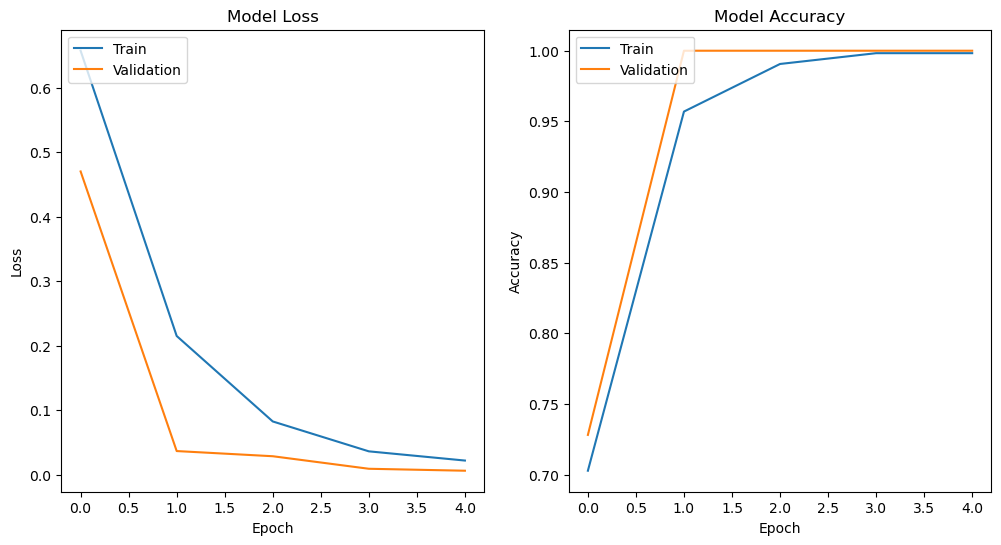

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization

SIZE = 64  # Assuming SIZE is the image size

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(SIZE, SIZE, 3), activation='relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(activation='relu', units=512))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
model.add(Dense(activation='sigmoid', units=2))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 31, 31, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0

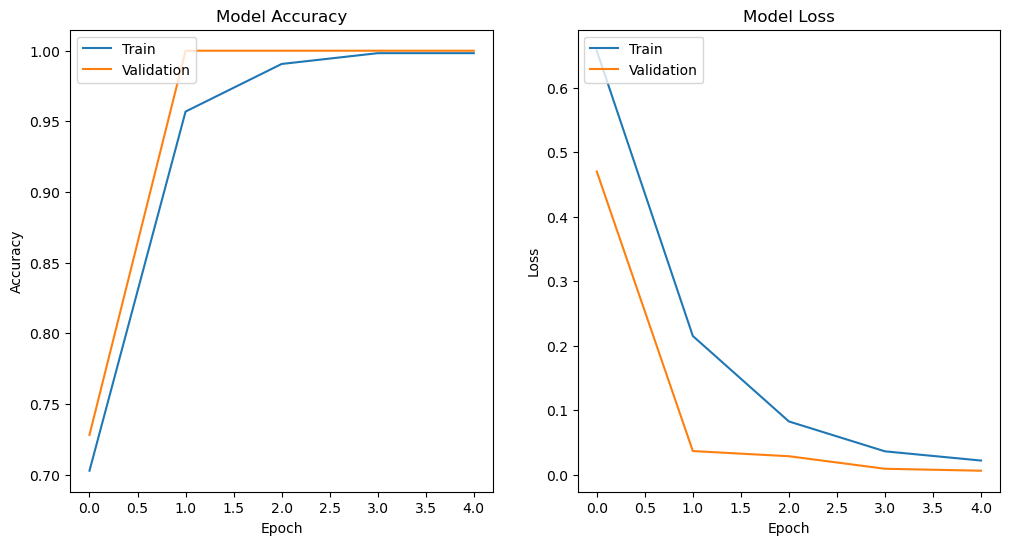

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Ploting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
